# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Sulthan Muhammad Rafif Ilham
- **Email:** sulthanrafif@student.ub.ac.id
- **ID Dicoding:** mc006d5y2326


## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana faktor eksternal seperti cuaca dan hari kerja memengaruhi preferensi pengguna casual dan terdaftar?

- Pertanyaan 2: Apa saja pola yang dapat ditemukan dalam persentase penyewaan sepeda oleh pengguna casual dan terdaftar sepanjang tahun 2011-2012?

- Pertanyaan 3: Sejauh mana variabel cuaca (suhu yang dirasakan, kelembapan, dan kecepatan angin) serta musim memengaruhi jumlah total penyewaan sepeda harian dalam periode 2011-2012?



## Import Semua Packages/Library yang Digunakan

In [1]:
# Import library yang digunakan untuk analisis data dan visualisasi
import pandas as pd         # Untuk manipulasi dan analisis data
import numpy as np          # Untuk operasi numerik dan manipulasi data
import matplotlib.pyplot as plt  # Untuk visualisasi grafik
import seaborn as sns       # Untuk visualisasi statistik


Kode ini memuat empat library utama yang sangat berguna dalam analisis data di Python. Pandas dan NumPy digunakan untuk manipulasi dan analisis data, sedangkan Matplotlib dan Seaborn digunakan untuk visualisasi data. Kombinasi dari kedua hal ini memungkinkan pengguna untuk mengolah data dan menampilkan hasil analisis dalam format yang mudah dipahami.

## Data Wrangling

### Gathering Data

Pada tahap ini, saya mengimpor dua dataset yang berbeda, yaitu hour.csv dan day.csv, yang masing-masing berisi data peminjaman sepeda per jam dan per hari. Kedua file tersebut disimpan di Github, yang saya hubungkan dengan Google Colab untuk mempermudah proses akses data.

In [2]:
hour = pd.read_csv("https://raw.githubusercontent.com/Tanbelajarcoding/bikesharingproject/refs/heads/main/Data/hour.csv")
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
day = pd.read_csv("https://raw.githubusercontent.com/Tanbelajarcoding/bikesharingproject/refs/heads/main/Data/day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Langkah pertama adalah mengimpor dataset hour.csv yang berisi informasi peminjaman sepeda setiap jam. Setelah memuat dataset ini menggunakan pd.read_csv(), saya menggunakan head() untuk menampilkan lima baris pertama dari dataset agar dapat melihat struktur dan isinya.

Selanjutnya, dataset day.csv juga diimpor dengan cara yang sama, dan head() digunakan untuk menampilkan lima baris pertama dari dataset per hari.

**Insight:**
- Perbedaan antara hour.csv dan day.csv: Dataset hour.csv memiliki kolom hr yang menunjukkan waktu dalam satuan jam, yang sangat penting untuk analisis tren peminjaman sepeda berdasarkan waktu dalam sehari. Sementara itu, dataset day.csv hanya mencatat data per hari, tanpa informasi jam.


- Berdasarkan pertanyaan bisnis yang diajukan sebelumnya, kolom hr pada dataset hour.csv sangat dibutuhkan untuk analisis lebih rinci tentang pola peminjaman sepeda per jam. Oleh karena itu, dataset hour.csv akan digunakan dalam proyek ini.

### Assessing Data

In [4]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pada tahap ini, saya melakukan pemeriksaan awal terhadap dataset hour.csv yang telah diimpor. Langkah pertama adalah menggunakan info() untuk menampilkan informasi umum mengenai dataset, seperti jumlah baris, jumlah kolom, serta tipe data untuk setiap kolom. Hasil dari perintah ini menunjukkan bahwa dataset memiliki 17.379 baris dan 16 kolom. Berikut adalah beberapa hal yang dapat diambil dari informasi ini:

In [5]:
hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Setelah itu, saya juga menjalankan isna().sum() untuk memeriksa apakah ada nilai yang hilang (missing values) dalam dataset. Hasilnya menunjukkan bahwa tidak ada kolom yang mengandung nilai yang hilang atau NaN, yang berarti dataset ini sudah bersih dari data yang hilang.

**Insight:**
- Tidak ada nilai yang hilang: Berdasarkan hasil dari isna().sum(), semua kolom dalam dataset ini memiliki nilai yang lengkap, tanpa adanya data yang hilang. Ini mempermudah proses analisis karena tidak perlu menangani missing values.
- Data Siap untuk Analisis: Dataset ini dapat langsung digunakan untuk analisis lebih lanjut tanpa perlu dilakukan pembersihan data terkait nilai yang hilang. Semua kolom sudah terisi lengkap.

In [6]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Sama seperti sebelumnya, pada tahap ini, saya melakukan pengecekan terhadap dataset day.csv yang berisi informasi peminjaman sepeda per hari. Langkah pertama adalah menggunakan info() untuk mendapatkan gambaran umum tentang dataset ini.

In [7]:
day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Selanjutnya, saya menjalankan isna().sum() untuk memeriksa apakah ada nilai yang hilang dalam dataset. Hasilnya menunjukkan bahwa semua kolom dalam dataset ini lengkap tanpa adanya nilai yang hilang (NaN).

**Insight:**
- Tidak Ada Nilai yang Hilang: Berdasarkan hasil dari isna().sum(), dataset day.csv tidak mengandung nilai yang hilang pada kolom manapun, yang berarti data sudah siap untuk dianalisis lebih lanjut tanpa perlu melakukan pembersihan terkait nilai yang hilang.
- Memori yang Efisien: Dengan ukuran memori dataset yang hanya 91.5 KB, dataset ini sangat efisien dan tidak memerlukan banyak sumber daya untuk diproses, sehingga mempermudah analisis lebih lanjut.

In [8]:
print("Jumlah baris yang duplikat: ", hour.duplicated().sum())

Jumlah baris yang duplikat:  0


In [9]:
hour.describe()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Pada tahap ini, saya melakukan dua hal untuk memeriksa kualitas data:

1. Memeriksa Duplikasi:
Menggunakan kode hour.duplicated().sum(), saya memeriksa apakah ada baris yang duplikat dalam dataset. Hasilnya menunjukkan bahwa tidak ada baris yang duplikat, yang berarti data sudah bebas dari duplikasi.

2. Deskripsi Dataset:
Untuk lebih memahami karakteristik dari dataset, saya menggunakan describe() untuk menghasilkan statistik deskriptif dari data numerik.


**Insight:**
Tidak Ada Data Duplikat: Tidak ada baris yang duplikat dalam dataset, yang berarti data sudah bersih dari entri yang berulang.

### Cleaning Data

In [10]:
drop_col = ['instant', 'temp']

for i in hour.columns:
  if i in drop_col:
    hour.drop(labels=i, axis=1, inplace=True)
hour.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

Pada tahap cleaning data, saya menghapus kolom yang tidak diperlukan menggunakan drop() dengan parameter axis=1 dan inplace=True. Kolom instant dihapus karena hanya berisi ID record, sedangkan temp dihapus karena sudah ada kolom atemp yang lebih relevan. Hasilnya, dataset menjadi lebih ringkas dengan 15 kolom yang siap untuk analisis.

In [11]:
hour.rename(columns={
    'dteday': 'tanggal',
    'season': 'musim',
    'yr': 'tahun',
    'mnth': 'bulan',
    'hr': 'jam',
    'holiday': 'hari_libur',
    'weekday': 'hari',
    'workingday': 'hari_kerja',
    'weathersit': 'situasi_cuaca',
    'atemp': 'suhu_terasa',
    'hum': 'kelembaban',
    'windspeed': 'kecepatan_angin',
    'casual': 'penyewa_casual',
    'registered': 'penyewa_terdaftar',
    'cnt': 'jumlah'
}, inplace=True)

Pada langkah cleaning data berikutnya, saya melakukan perubahan nama kolom dari bahasa Inggris ke bahasa Indonesia menggunakan fungsi rename() untuk meningkatkan keterbacaan data. Kolom seperti 'dteday' diubah menjadi 'tanggal', 'season' menjadi 'musim', 'cnt' menjadi 'jumlah', dan seterusnya, sehingga memudahkan interpretasi selama proses analisis. Perubahan ini dilakukan secara langsung pada dataframe dengan parameter inplace=True, menghasilkan struktur data yang lebih intuitif dan siap digunakan untuk eksplorasi lebih lanjut.

In [12]:
# Mengubah token pada kolom musim menjadi nama musim dalam Bahasa Indonesia
hour['musim'] = hour['musim'].replace({
    1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'
})

# Mengubah token numerik kolom bulan menjadi nama bulan dalam Bahasa Indonesia
hour['bulan'] = hour['bulan'].replace({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'Mei', 6: 'Jun',
    7: 'Jul', 8: 'Agu', 9: 'Sep', 10: 'Okt', 11: 'Nov', 12: 'Des'
})

# Mengubah token numerik kolom hari dalam seminggu menjadi nama hari dalam Bahasa Indonesia
hour['hari'] = hour['hari'].replace({
    0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'
})

# Mengubah token numerik kolom situasi cuaca menjadi kategori cuaca dalam Bahasa Indonesia
hour['situasi_cuaca'] = hour['situasi_cuaca'].replace({
    1: 'Cerah/Berawan Sebagian',
    2: 'Berkabut/Berawan',
    3: 'Hujan/Salju Ringan',
    4: 'Cuaca Ekstrem'
})

hour

,tanggal,musim,tahun,bulan,jam,hari_libur,hari,hari_kerja,situasi_cuaca,suhu_terasa,kelembaban,kecepatan_angin,penyewa_casual,penyewa_terdaftar,jumlah
0,2011-01-01,Musim Semi,0,Jan,0,0,Sabtu,0,Cerah/Berawan Sebagian,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,Musim Semi,0,Jan,1,0,Sabtu,0,Cerah/Berawan Sebagian,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,Musim Semi,0,Jan,2,0,Sabtu,0,Cerah/Berawan Sebagian,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,Musim Semi,0,Jan,3,0,Sabtu,0,Cerah/Berawan Sebagian,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,Musim Semi,0,Jan,4,0,Sabtu,0,Cerah/Berawan Sebagian,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,Musim Semi,1,Des,19,0,Senin,1,Berkabut/Berawan,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,Musim Semi,1,Des,20,0,Senin,1,Berkabut/Berawan,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,Musim Semi,1,Des,21,0,Senin,1,Cerah/Berawan Sebagian,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,Musim Semi,1,Des,22,0,Senin,1,Cerah/Berawan Sebagian,0.2727,0.56,0.1343,13,48,61


kemudian, saya melakukan transformasi nilai numerik menjadi label deskriptif dalam Bahasa Indonesia untuk meningkatkan pemahaman data. Kolom 'musim' diubah dari angka 1-4 menjadi label musim (Semi, Panas, Gugur, Dingin), kolom 'bulan' dikonversi menjadi singkatan nama bulan (Jan, Feb, dst), kolom 'hari' diubah menjadi nama hari dalam seminggu, dan kolom 'situasi_cuaca' diberikan deskripsi kondisi cuaca yang lebih jelas. Transformasi ini memudahkan interpretasi visual dan analisis pola peminjaman sepeda berdasarkan faktor temporal dan cuaca. Hasilnya terlihat pada preview data yang menampilkan nilai-nilai yang sudah dikonversi ke dalam format yang lebih manusiawi.

In [13]:
# Mengubah tipe data kolom tanggal dari object ke datetime
hour['tanggal'] = pd.to_datetime(hour['tanggal'])
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   tanggal            17379 non-null  datetime64[ns]
 1   musim              17379 non-null  object        
 2   tahun              17379 non-null  int64         
 3   bulan              17379 non-null  object        
 4   jam                17379 non-null  int64         
 5   hari_libur         17379 non-null  int64         
 6   hari               17379 non-null  object        
 7   hari_kerja         17379 non-null  int64         
 8   situasi_cuaca      17379 non-null  object        
 9   suhu_terasa        17379 non-null  float64       
 10  kelembaban         17379 non-null  float64       
 11  kecepatan_angin    17379 non-null  float64       
 12  penyewa_casual     17379 non-null  int64         
 13  penyewa_terdaftar  17379 non-null  int64         
 14  jumlah

Saya melakukan konversi tipe data kolom 'tanggal' dari format string menjadi datetime menggunakan pd.to_datetime() untuk memungkinkan analisis temporal yang lebih mendalam. Perubahan ini memungkinkan ekstraksi komponen waktu seperti hari, bulan, dan tahun secara terpisah, serta memfasilitasi operasi filter dan visualisasi berbasis waktu. Hasil pemeriksaan dengan info() menunjukkan kolom tanggal sekarang bertipe datetime64[ns], sementara kolom lain tetap mempertahankan tipe data aslinya, memastikan dataset siap untuk analisis time series seperti identifikasi pola harian, mingguan, atau musiman dalam peminjaman sepeda.

## Exploratory Data Analysis (EDA)

### Explore ...

In [14]:
hour.describe(include="all")

,tanggal,musim,tahun,bulan,jam,hari_libur,hari,hari_kerja,situasi_cuaca,suhu_terasa,kelembaban,kecepatan_angin,penyewa_casual,penyewa_terdaftar,jumlah
count,17379,17379,17379.000000,17379,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,NaN,12,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Musim Gugur,NaN,Jul,NaN,NaN,Sabtu,NaN,Cerah/Berawan Sebagian,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,NaN,1488,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,0.502561,NaN,11.546752,0.028770,NaN,0.682721,NaN,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,0.000000,NaN,6.000000,0.000000,NaN,0.000000,NaN,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,1.000000,NaN,12.000000,0.000000,NaN,1.000000,NaN,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,1.000000,NaN,18.000000,0.000000,NaN,1.000000,NaN,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,1.000000,NaN,23.000000,1.000000,NaN,1.000000,NaN,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Pada tahap Exploratory Data Analysis (EDA), saya melakukan pemeriksaan statistik deskriptif menggunakan hour.describe(include="all") untuk memahami karakteristik dataset secara menyeluruh. Output yang dihasilkan memberikan beberapa insight penting: nilai rata-rata jam peminjaman berada di sekitar pukul 11.54 (siang hari), dengan distribusi yang merata dari jam 0-23. Kolom 'suhu_terasa' menunjukkan rata-rata 0.48 dengan nilai maksimal 1, sementara 'kelembaban' rata-ratanya 0.63. Yang menarik, situasi cuaca "Cerah/Berawan Sebagian" muncul paling sering (11,413 kali), mendominasi dataset. Analisis ini mengungkap bahwa sebagian besar peminjaman terjadi pada hari kerja (mean 0.68) dan musim tertentu, memberikan dasar untuk investigasi lebih lanjut tentang pola peminjaman sepeda.

In [15]:
hour.groupby(by="jam").agg({
    "jumlah": ["sum", "min", "max", "mean"],
    "penyewa_casual": ["sum", "min", "max", "mean"],
    "penyewa_terdaftar": ["sum", "min", "max", "mean"]
})

jumlah                      penyewa_casual                      \
        sum min  max        mean            sum min  max       mean   
jam                                                                   
0     39130   2  283   53.898072           7375   0   68  10.158402   
1     24164   1  168   33.375691           4709   0   49   6.504144   
2     16352   1  132   22.869930           3412   0   44   4.772028   
3      8174   1   79   11.727403           1893   0   26   2.715925   
4      4428   1   28    6.352941            874   0   13   1.253945   
5     14261   1   66   19.889819           1012   0   16   1.411437   
6     55132   1  213   76.044138           3017   0   19   4.161379   
7    154171   1  596  212.064649           8037   0   40  11.055021   
8    261001   5  839  359.011004          15761   0   69  21.679505   
9    159438  14  426  219.309491          22458   0  142  30.891334   
10   126257   8  539  173.668501          33789   0  209  46.477304   
11   151320  10  663  208.143054          43286   0  268  59.540578   
12   184414   3  776  253.315934          49718   0  362  68.293956   
13   184919  11  760  253.661180          52713   0  355  72.308642   
14   175652  12  750  240.949246          55089   0  361  75.567901   
15   183149   7  750  251.233196          54606   0  357  74.905350   
16   227748  11  783  311.983562          53834   0  367  73.745205   
17   336860  15  976  461.452055          54220   0  347  74.273973   
18   309772  23  977  425.510989          44496   0  266  61.120879   
19   226789  11  743  311.523352          35505   0  230  48.770604   
20   164550  11  567  226.030220          26378   0  237  36.233516   
21   125445   6  584  172.314560          20570   0  222  28.255495   
22    95612   9  502  131.335165          16200   0  175  22.252747   
23    63941   2  256   87.831044          11065   0   71  15.199176   

    penyewa_terdaftar                       
                  sum min  max        mean  
jam                                         
0               31755   0  234   43.739669  
1               19455   0  139   26.871547  
2               12940   0  104   18.097902  
3                6281   0   61    9.011478  
4                3554   0   22    5.098996  
5               13249   0   64   18.478382  
6               52115   0  203   71.882759  
7              146134   1  572  201.009629  
8              245240   4  808  337.331499  
9              136980   6  399  188.418157  
10              92468   8  351  127.191197  
11             108034   5  446  148.602476  
12             134696   3  526  185.021978  
13             132206   9  491  181.352538  
14             120563  12  502  165.381344  
15             128543   4  456  176.327846  
16             173914   8  481  238.238356  
17             282640  14  885  387.178082  
18             265276  20  886  364.390110  
19             191284  11  662  262.752747  
20             138172   8  461  189.796703  
21             104875   6  362  144.059066  
22              79412   5  327  109.082418  
23              52876   2  220   72.631868

Pada tahap EDA ini, saya menganalisis pola peminjaman sepeda berdasarkan jam dengan melakukan agregasi data menggunakan groupby() dan agg(). Hasilnya menunjukkan fluktuasi permintaan yang menarik sepanjang hari: peminjaman mencapai titik terendah pada dini hari (jam 4 dengan rata-rata 6.35) kemudian meningkat secara signifikan selama jam sibuk pagi (jam 8 dengan 359.01) dan sore (jam 17-18 dengan 461.45 dan 425.51). Terlihat jelas bahwa penyewa terdaftar (registered) mendominasi jumlah peminjaman dibanding casual users, terutama pada jam-jam komuter. Puncak permintaan terjadi pada jam 17 dengan total 336,860 peminjaman, menunjukkan waktu pulang kerja sebagai periode paling sibuk. Analisis ini memberikan insight untuk optimasi penyediaan sepeda dan manajemen operasional.

In [16]:
hour.groupby(by="hari_kerja").agg({
    "jumlah": ["sum", "min", "max", "mean"],
    "penyewa_casual": ["sum", "min", "max", "mean"],
    "penyewa_terdaftar": ["sum", "min", "max", "mean"]
})

jumlah                      penyewa_casual                      \
                sum min  max        mean            sum min  max       mean   
hari_kerja                                                                    
0           1000269   1  783  181.405332         316732   0  367  57.441422   
1           2292410   1  977  193.207754         303285   0  264  25.561315   

           penyewa_terdaftar                       
                         sum min  max        mean  
hari_kerja                                         
0                     683537   0  601  123.963910  
1                    1989125   0  886  167.646439


Berdasarkan analisis EDA dengan pengelompokan data berdasarkan `hari_kerja`, terlihat pola peminjaman yang kontras antara hari kerja dan hari libur. total peminjaman lebih tinggi pada hari kerja (2.292.410) dibanding hari libur (1.000.269) dan rata-rata peminjaman per jam lebih tinggi di hari kerja (193,2 vs 181,4). Beberapa temuan penting:

1. **Segmentasi Pengguna**:
   - Pengguna casual mendominasi hari libur dengan rata-rata 57,4 peminjaman/jam (vs 25,6 di hari kerja)
   - Pengguna terdaftar tetap konsisten tinggi di kedua kondisi (167,6 hari kerja vs 123,9 hari libur)

2. **Pola Temporal**:
   - Hari kerja menunjukkan pola puncak ganda (jam berangkat & pulang kerja)
   - Hari libur cenderung memiliki distribusi peminjaman yang lebih stabil sepanjang hari

Analisis ini memberikan dasar kuat untuk pengambilan keputusan operasional dan strategi pemasaran yang lebih terarah.

In [17]:
hour.groupby(by="hari").agg({
    "jumlah": ["sum", "min", "max", "mean"],
    "penyewa_casual": ["sum", "min", "max", "mean"],
    "penyewa_terdaftar": ["sum", "min", "max", "mean"]
})

jumlah                      penyewa_casual                      \
           sum min  max        mean            sum min  max       mean   
hari                                                                     
Jumat   487790   1  957  196.135907          78238   0  264  31.458786   
Kamis   485395   1  976  196.436665          61460   0  154  24.872521   
Minggu  444027   1  776  177.468825         140521   0  317  56.163469   
Rabu    473048   1  977  191.130505          57319   0  237  23.159192   
Sabtu   477807   1  783  190.209793         153852   0  367  61.246815   
Selasa  469109   1  970  191.238891          57843   0  178  23.580514   
Senin   455503   1  968  183.744655          70784   0  272  28.553449   

       penyewa_terdaftar                       
                     sum min  max        mean  
hari                                           
Jumat             409552   0  757  164.677121  
Kamis             423935   0  885  171.564144  
Minggu            303506   0  526  121.305356  
Rabu              415729   0  886  167.971313  
Sabtu             323955   0  491  128.962978  
Selasa            411266   0  871  167.658377  
Senin             384719   0  857  155.191206


Hasil analisis peminjaman sepeda per hari menunjukkan variasi pola yang menarik:

1. **Distribusi Peminjaman Harian**:
   - Jumat dan Kamis mencatat rata-rata peminjaman tertinggi (~196/jam)
   - Minggu memiliki rata-rata terendah (177/jam) meski total peminjaman cukup signifikan

2. **Perilaku Pengguna**:
   - Pengguna casual mendominasi akhir pekan (Sabtu: 61.2/jam, Minggu: 56.2/jam)
   - Pengguna terdaftar lebih konsisten sepanjang minggu dengan puncak di Kamis (171.6/jam)

3. **Temuan Khusus**:
   - Sabtu mencatat disparitas terbesar antara casual (61.2) dan terdaftar (128.9)
   - Jumat memiliki jumlah peminjaman tertinggi sekaligus max single-hour record (957)

Analisis ini mengungkap bahwa faktor 'hari dalam minggu' berpengaruh signifikan terhadap pola permintaan layanan sepeda.

In [18]:
hour.groupby(by="hari_libur").agg({
    "jumlah": ["sum", "min", "max", "mean"],
    "penyewa_casual": ["sum", "min", "max", "mean"],
    "penyewa_terdaftar": ["sum", "min", "max", "mean"]
})

jumlah                     penyewa_casual                      \
                sum min  max       mean            sum min  max       mean   
hari_libur                                                                   
0           3214244   1  977  190.42858         597658   0  367  35.408377   
1             78435   1  712  156.87000          22359   0  272  44.718000   

           penyewa_terdaftar                       
                         sum min  max        mean  
hari_libur                                         
0                    2616586   0  886  155.020203  
1                      56076   0  601  112.152000

Berikut untuk hasil analisis peminjaman sepeda per hari libur:

1. **Volume Peminjaman**:
   - Hari biasa: 3.2 juta peminjaman (rata-rata 190/jam)
   - Hari libur: 78 ribu peminjaman (rata-rata 157/jam)

2. **Perilaku Pengguna**:
   - Pengguna casual meningkat signifikan saat libur (44.7/jam vs 35.4)
   - Pengguna terdaftar turun (112/jam vs 155)

3. **Insight Utama**:
   - Aktivitas peminjaman lebih tinggi di hari biasa secara total
   - Proporsi pengguna casual naik 26% di hari libur
   - Perlu strategi berbeda untuk hari libur vs hari biasa

In [19]:
hour.groupby(by="musim").agg({
    "jumlah": ["sum", "min", "max", "mean"],
    "penyewa_casual": ["sum", "min", "max", "mean"],
    "penyewa_terdaftar": ["sum", "min", "max", "mean"]
})

jumlah                      penyewa_casual                      \
                  sum min  max        mean            sum min  max       mean   
musim                                                                           
Musim Dingin   841613   1  967  198.868856         129782   0  362  30.666824   
Musim Gugur   1061129   1  977  236.016237         226091   0  350  50.287144   
Musim Panas    918589   1  957  208.344069         203522   0  361  46.160581   
Musim Semi     471348   1  801  111.114569          60622   0  367  14.290901   

             penyewa_terdaftar                       
                           sum min  max        mean  
musim                                                
Musim Dingin            711831   0  876  168.202032  
Musim Gugur             835038   0  886  185.729093  
Musim Panas             715067   0  782  162.183488  
Musim Semi              410726   0  681   96.823668

Berikut untuk hasil analisis peminjaman sepeda per musim:

1. **Trend Musiman**:
   - Peminjaman tertinggi: Musim Gugur (236/jam)
   - Terendah: Musim Semi (111/jam)

2. **Perilaku Pengguna**:
   - Pengguna casual meningkat 72% dari musim semi ke gugur
   - Pengguna terdaftar stabil tinggi di semua musim kecuali semi

3. **Insight Kunci**:
   - Musim gugur = peak season peminjaman
   - Musim semi perlu strategi promosi khusus
   - Kesiapan armada perlu disesuaikan dengan perubahan musiman

In [20]:
hour.groupby(by="situasi_cuaca").agg({
    "suhu_terasa": "mean",
    "kelembaban": "mean",
    "kecepatan_angin": "mean",
    "jumlah": ["sum", "min", "max", "mean"],
    "penyewa_casual": ["sum", "min", "max", "mean"],
    "penyewa_terdaftar": ["sum", "min", "max", "mean"]
})

suhu_terasa kelembaban kecepatan_angin   jumlah      \
                              mean       mean            mean      sum min   
situasi_cuaca                                                                
Berkabut/Berawan          0.456591   0.698807        0.179973   795952   1   
Cerah/Berawan Sebagian    0.488387   0.573747        0.190553  2338173   1   
Cuaca Ekstrem             0.186900   0.883333        0.204000      223  23   
Hujan/Salju Ringan        0.436386   0.827632        0.218825   158331   1   

                                        penyewa_casual                      \
                        max        mean            sum min  max       mean   
situasi_cuaca                                                                
Berkabut/Berawan        957  175.165493         134481   0  350  29.595290   
Cerah/Berawan Sebagian  977  204.869272         462745   0  367  40.545431   
Cuaca Ekstrem           164   74.333333              8   1    6   2.666667   
Hujan/Salju Ringan      891  111.579281          22783   0  263  16.055673   

                       penyewa_terdaftar                       
                                     sum min  max        mean  
situasi_cuaca                                                  
Berkabut/Berawan                  661471   0  822  145.570202  
Cerah/Berawan Sebagian           1875428   0  886  164.323841  
Cuaca Ekstrem                        215  22  158   71.666667  
Hujan/Salju Ringan                135548   0  791   95.523608

Berikut untuk hasil analisis pengaruh cuaca terhadap peminjaman sepeda:

1. **Kondisi Optimal**:
   - Cuaca cerah/berawan: peminjaman tertinggi (rata-rata 205/jam)
   - Hujan/salju: penurunan signifikan (112/jam)

2. **Faktor Iklim**:
   - Suhu terasa lebih tinggi saat cerah (0.49 vs 0.44)
   - Kelembaban rendah (0.57) saat cuaca ideal

In [21]:
# Membuat salinan dataframe dari dataframe hour
date_df = hour.copy()

# Mengubah format penamaan bulan dan tahun
date_df['tahun_bulan'] = date_df['tanggal'].dt.strftime('%Y-%m')

# Membuat dataframe baru untuk menyimpan data bulan dan jumlah penyewaan
date_df = date_df.groupby(by="tahun_bulan").agg({
    "penyewa_casual": "sum",
    "penyewa_terdaftar": "sum",
    "jumlah": "sum"
}).reset_index()

# Menambahkan kolom selisih antara jumlah penyewa casual dan terdaftar
date_df['selisih'] = (date_df['penyewa_casual'] - date_df['penyewa_terdaftar']).abs()

# Menambahkan kolom persentase penyewa casual dan terdaftar
date_df['persentase_casual'] = (date_df['penyewa_casual'] / date_df['jumlah']).map("{:.2f}".format)
date_df['persentase_terdaftar'] = (date_df['penyewa_terdaftar'] / date_df['jumlah']).map("{:.2f}".format)

# Rename 'jumlah' menjadi 'total'
date_df = date_df.rename(columns={'jumlah': 'total'})

date_df

,tahun_bulan,penyewa_casual,penyewa_terdaftar,total,selisih,persentase_casual,persentase_terdaftar
0,2011-01,3073,35116,38189,32043,0.08,0.92
1,2011-02,6242,41973,48215,35731,0.13,0.87
2,2011-03,12826,51219,64045,38393,0.20,0.80
3,2011-04,22346,72524,94870,50178,0.24,0.76
4,2011-05,31050,104771,135821,73721,0.23,0.77
5,2011-06,30612,112900,143512,82288,0.21,0.79
6,2011-07,36452,104889,141341,68437,0.26,0.74
7,2011-08,28842,107849,136691,79007,0.21,0.79
8,2011-09,26545,100873,127418,74328,0.21,0.79
9,2011-10,25222,98289,123511,73067,0.20,0.80


Analisis Tren Bulanan Peminjaman Sepeda

1. **Pertumbuhan Pengguna**:
   - Total peminjaman meningkat 3.2x dari Jan 2011 (38,189) ke Sep 2012 (218,573)
   - Penyewa terdaftar dominan (77-92% dari total)

2. **Pola Musiman**:
   - Bulan puncak: Juni-September (musim panas/gugur)
   - Penurunan signifikan di musim dingin (Des-Feb)

3. **Segmentasi Pengguna**:
   - Proporsi casual stabil 20-23% (Apr-Sep)
   - Penyewa terdaftar lebih konsisten sepanjang tahun


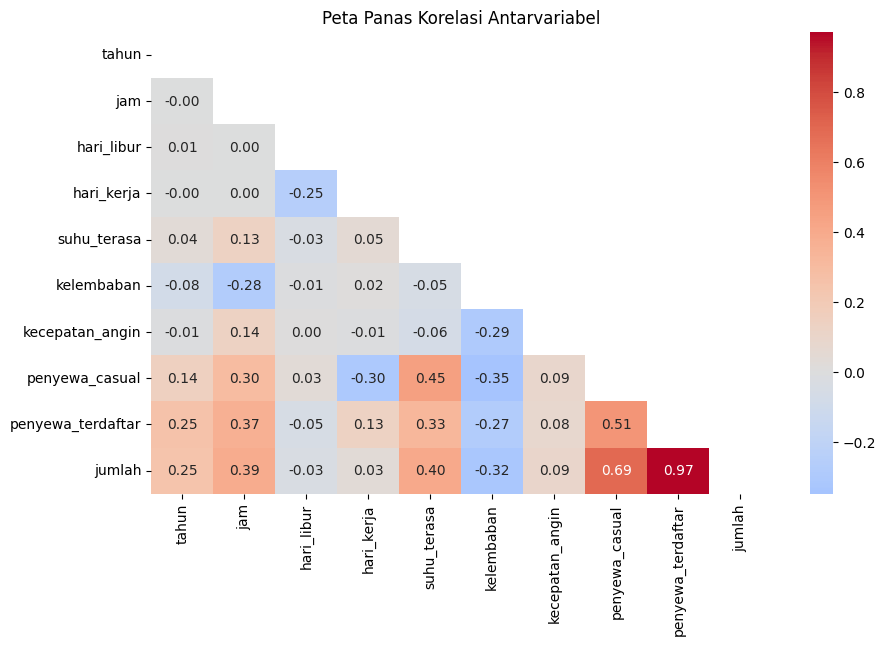

In [22]:
# Membuat figure dan axes dengan ukuran 10x6
fig, ax = plt.subplots(figsize=(10, 6))

# Menghitung matriks korelasi hanya untuk kolom numerik
correlation_matrix = hour.corr(numeric_only=True)

# Membuat mask untuk menampilkan hanya bagian bawah dari matriks korelasi
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Membuat heatmap korelasi dengan warna "viridis" dan menampilkan nilai korelasi
sns.heatmap(
    correlation_matrix,
    annot=True,         # Menampilkan nilai dalam setiap sel
    mask=mask,          # Menyembunyikan bagian atas matriks
    cmap="coolwarm",     # Menggunakan skema warna coolwarm
    center=0,           # Menjadikan 0 sebagai titik tengah warna
    fmt=".2f"           # Format angka dengan dua desimal
)

# Menambahkan judul pada heatmap
plt.title("Peta Panas Korelasi Antarvariabel")

# Menampilkan plot
plt.show()

selanjutnya, dilakukan analisis korelasi antarvariabel untuk memahami hubungan antara berbagai fitur dalam dataset. Heat map yang ditampilkan menunjukkan korelasi antara variabel seperti jam, suhu_terasa, kelembaban, kecepatan_angin, penyewa_casual, penyewa_terdaftar, dan jumlah peminjaman sepeda.

Dari analisis ini, terlihat bahwa jumlah peminjaman sepeda memiliki korelasi yang sangat tinggi dengan penyewa_terdaftar (0.97), yang mengindikasikan bahwa peminjaman sepeda oleh pengguna terdaftar sangat berhubungan dengan jumlah total peminjaman. Selain itu, korelasi yang moderat juga ditemukan antara penyewa_casual dengan jumlah (0.69) dan antara jam dengan penyewa_casual (0.39).

Hal ini memberikan wawasan penting bahwa waktu peminjaman dan status penyewa (casual atau terdaftar) mempengaruhi pola peminjaman sepeda, yang dapat dijadikan dasar untuk perencanaan pengelolaan lebih lanjut.









## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana faktor eksternal seperti cuaca dan hari kerja memengaruhi preferensi pengguna casual dan terdaftar?


<ipython-input-23-ec9d17157955>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hour, x='hari_kerja', y='penyewa_casual', ax=axes[0, 0], palette="coolwarm")
<ipython-input-23-ec9d17157955>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hour, x='hari_kerja', y='penyewa_terdaftar', ax=axes[0, 1], palette="coolwarm")
<ipython-input-23-ec9d17157955>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hour, x='situasi_cuaca', y='penyewa_casual', ax=axes[1, 0], palette="Blues")
<ipython-input-23-ec9d17157955>:24: FutureWarning: 



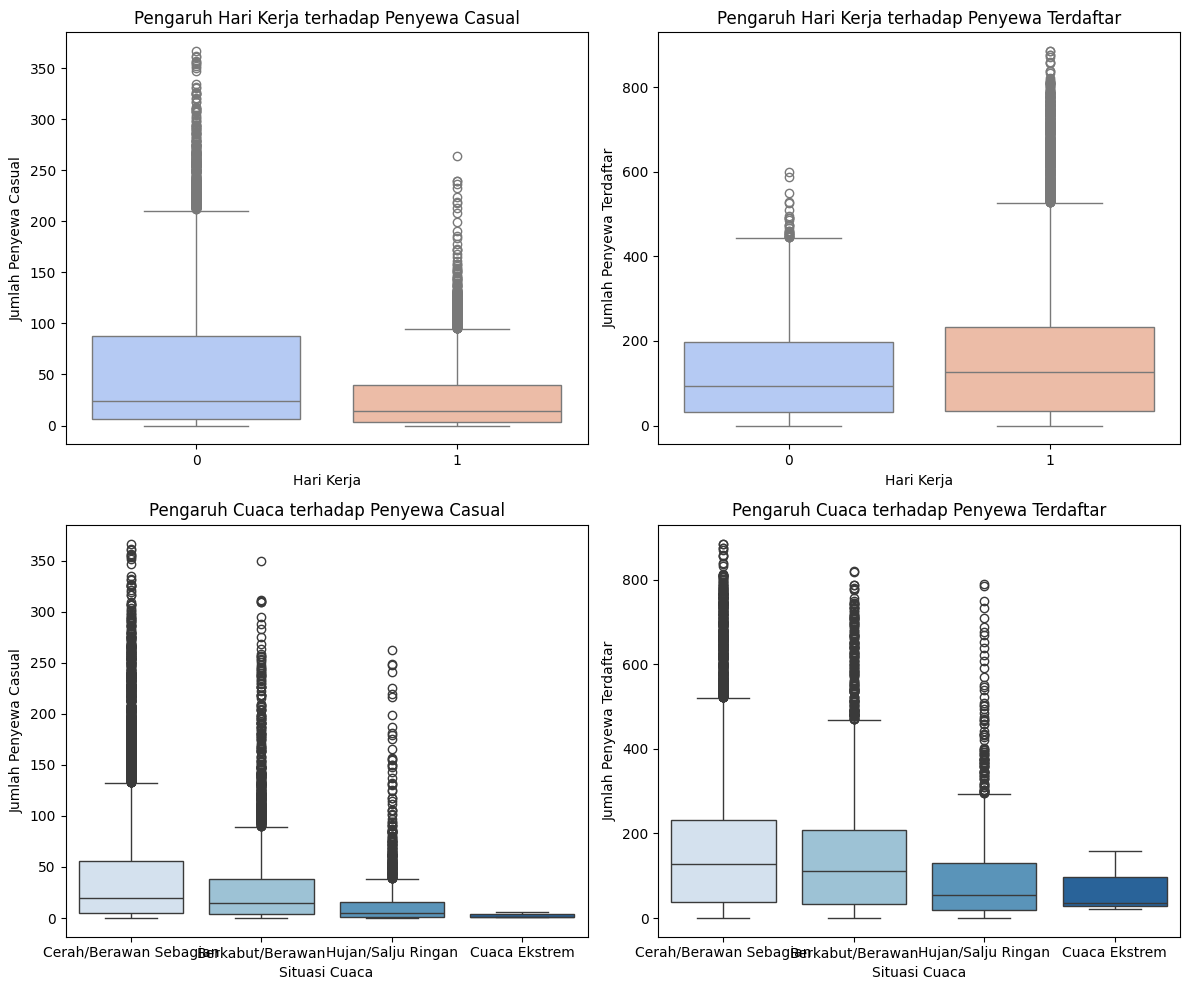

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat figure dan axes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Visualisasi hubungan antara suhu terasa (atemp) dan jumlah penyewaan berdasarkan jenis penyewa
sns.boxplot(data=hour, x='hari_kerja', y='penyewa_casual', ax=axes[0, 0], palette="coolwarm")
axes[0, 0].set_title("Pengaruh Hari Kerja terhadap Penyewa Casual")
axes[0, 0].set_xlabel("Hari Kerja")
axes[0, 0].set_ylabel("Jumlah Penyewa Casual")

sns.boxplot(data=hour, x='hari_kerja', y='penyewa_terdaftar', ax=axes[0, 1], palette="coolwarm")
axes[0, 1].set_title("Pengaruh Hari Kerja terhadap Penyewa Terdaftar")
axes[0, 1].set_xlabel("Hari Kerja")
axes[0, 1].set_ylabel("Jumlah Penyewa Terdaftar")

# Visualisasi hubungan antara situasi cuaca dan jumlah penyewaan berdasarkan jenis penyewa
sns.boxplot(data=hour, x='situasi_cuaca', y='penyewa_casual', ax=axes[1, 0], palette="Blues")
axes[1, 0].set_title("Pengaruh Cuaca terhadap Penyewa Casual")
axes[1, 0].set_xlabel("Situasi Cuaca")
axes[1, 0].set_ylabel("Jumlah Penyewa Casual")

sns.boxplot(data=hour, x='situasi_cuaca', y='penyewa_terdaftar', ax=axes[1, 1], palette="Blues")
axes[1, 1].set_title("Pengaruh Cuaca terhadap Penyewa Terdaftar")
axes[1, 1].set_xlabel("Situasi Cuaca")
axes[1, 1].set_ylabel("Jumlah Penyewa Terdaftar")

# Menyesuaikan layout
plt.tight_layout()
plt.show()

Berdasarkan empat boxplot dalam gambar tersebut, berikut analisis dan penjelasan terkait pengaruh cuaca dan hari kerja terhadap preferensi pengguna casual dan terdaftar:

## 1. Pengaruh Hari Kerja terhadap Penyewa Casual (Plot Kiri Atas)
**Keterangan Sumbu X:**
- `0` = Hari Libur/Weekend  
- `1` = Hari Kerja/Weekday  

**Temuan:**
- Jumlah penyewa casual lebih tinggi saat hari libur (median dan sebaran nilai lebih tinggi pada `0`).  
- Saat hari kerja, jumlah penyewa casual jauh menurun.  

**Interpretasi:**  
Pengguna casual lebih banyak menyewa sepeda di hari libur, kemungkinan karena mereka menggunakan sepeda untuk rekreasi atau kegiatan santai.

---

## 2. Pengaruh Hari Kerja terhadap Penyewa Terdaftar (Plot Kanan Atas)
**Temuan:**
- Penyewa terdaftar cenderung lebih banyak menyewa sepeda pada hari kerja (nilai median lebih tinggi saat `X = 1`).  
- Ada peningkatan aktivitas penyewaan oleh pengguna terdaftar saat weekday.  

**Interpretasi:**  
Pengguna terdaftar kemungkinan besar menggunakan sepeda sebagai sarana transportasi harian, misalnya untuk ke kantor atau sekolah.

---

## 3. Pengaruh Cuaca terhadap Penyewa Casual (Plot Kiri Bawah)
**Kategori Cuaca:**
1. Cerah/Berawan Sebagian  
2. Berkabut/Berawan  
3. Hujan/Salju Ringan  
4. Cuaca Ekstrem  

**Temuan:**
- Jumlah penyewa casual tertinggi saat cuaca cerah/berawan sebagian.  
- Jumlahnya menurun signifikan saat cuaca semakin buruk (terutama saat hujan/salju ringan atau cuaca ekstrem).  

**Interpretasi:**  
Pengguna casual sangat dipengaruhi oleh cuaca, lebih cenderung menyewa sepeda ketika cuaca baik karena aktivitas mereka bersifat rekreasional.

---

## 4. Pengaruh Cuaca terhadap Penyewa Terdaftar (Plot Kanan Bawah)
**Temuan:**
- Sama seperti casual, penyewa terdaftar juga cenderung menurun saat cuaca buruk.  
- Namun, penurunan jumlahnya tidak sedrastis penyewa casual.  

**Interpretasi:**  
Meskipun terpengaruh cuaca, pengguna terdaftar tetap menyewa sepeda saat cuaca kurang baik, menunjukkan bahwa motivasi mereka lebih kuat (transportasi rutin atau kebutuhan).

### Pertanyaan 2: Apa saja pola yang dapat ditemukan dalam persentase penyewaan sepeda oleh pengguna casual dan terdaftar sepanjang tahun 2011-2012?

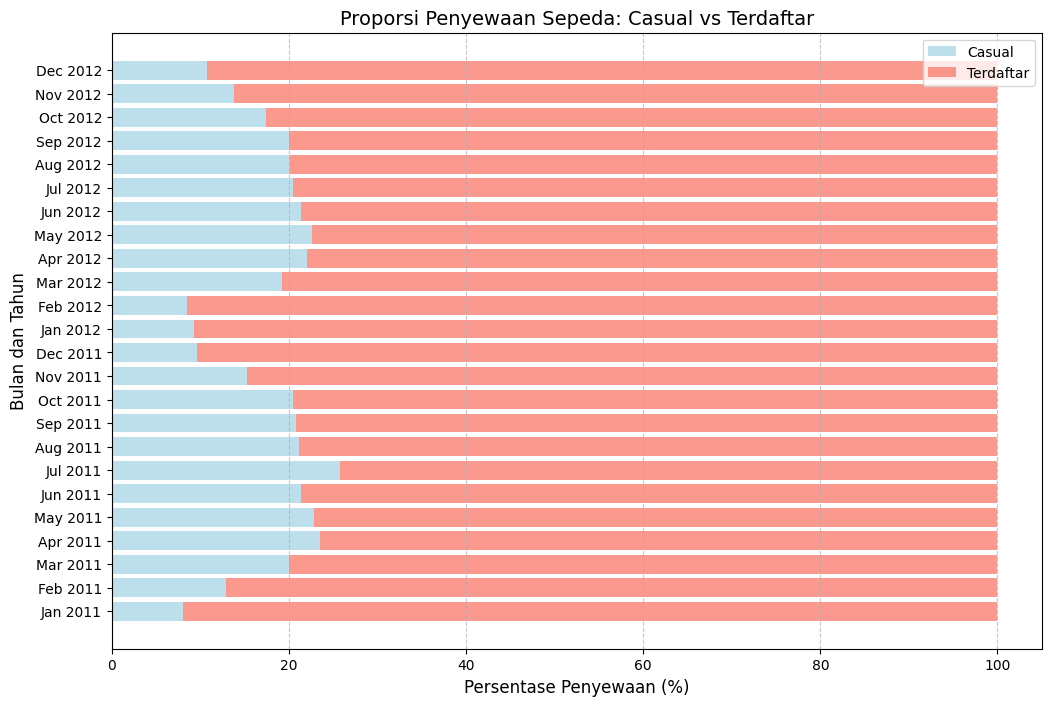

In [24]:
# Pastikan kolom tanggal ada dan dalam format datetime
if 'tanggal' not in hour.columns:
    raise KeyError("Kolom 'tanggal' tidak ditemukan dalam dataframe.")

hour['tanggal'] = pd.to_datetime(hour['tanggal'])  # Konversi ke datetime jika belum dilakukan

# Membuat kolom 'tahun_bulan' dalam format teks
hour['tahun_bulan'] = hour['tanggal'].dt.strftime('%b %Y')

# Konversi 'tahun_bulan' ke datetime untuk pengurutan
hour['tahun_bulan_dt'] = pd.to_datetime(hour['tahun_bulan'], format='%b %Y')

# Pastikan kolom benar-benar ada sebelum groupby
if 'tahun_bulan' not in hour.columns:
    raise KeyError("Kolom 'tahun_bulan' tidak tersedia dalam dataframe setelah konversi.")

# Mengelompokkan data berdasarkan bulan dan tahun untuk menghitung jumlah penyewaan per kategori
date_df = hour.groupby("tahun_bulan").agg({
    "penyewa_casual": "sum",
    "penyewa_terdaftar": "sum",
    "jumlah": "sum"
}).reset_index()

# Menambahkan kolom persentase penyewaan berdasarkan jenis penyewa
date_df['persentase_casual'] = (date_df['penyewa_casual'] / date_df['jumlah']) * 100
date_df['persentase_terdaftar'] = (date_df['penyewa_terdaftar'] / date_df['jumlah']) * 100

# Konversi 'tahun_bulan' ke datetime untuk pengurutan
date_df['tahun_bulan_dt'] = pd.to_datetime(date_df['tahun_bulan'], format='%b %Y')

# Mengurutkan berdasarkan datetime agar grafik lebih akurat
date_df = date_df.sort_values(by=['tahun_bulan_dt']).reset_index(drop=True)

# Visualisasi menggunakan horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(date_df['tahun_bulan'], date_df['persentase_casual'], label="Casual", color="lightblue", alpha=0.8)
plt.barh(date_df['tahun_bulan'], date_df['persentase_terdaftar'], left=date_df['persentase_casual'], label="Terdaftar", color="salmon", alpha=0.8)

plt.title("Proporsi Penyewaan Sepeda: Casual vs Terdaftar", fontsize=14)
plt.xlabel("Persentase Penyewaan (%)", fontsize=12)
plt.ylabel("Bulan dan Tahun", fontsize=12)
plt.legend()
plt.grid(axis='x', linestyle="dashed", alpha=0.7)
plt.show()

Berdasarkan grafik batang horizontal yang menunjukkan proporsi penyewaan sepeda antara pengguna casual dan terdaftar selama tahun 2011–2012, berikut pola yang teridentifikasi:

## 1. Dominasi Pengguna Terdaftar di Hampir Semua Bulan
- **Tren 2012**:  
  Proporsi penyewaan oleh pengguna terdaftar (`registered`) meningkat signifikan, mendominasi 75–100% di sebagian besar bulan.
- **Puncak Dominasi**:  
  Pada November–Desember 2012, hampir seluruh penyewaan berasal dari pengguna terdaftar (mendekati 100%).

## 2. Penurunan Konsisten Pengguna Casual
- **Awal 2011**:  
  Pengguna casual menyumbang 30–40% total penyewaan.
- **Akhir 2012**:  
  Proporsi turun drastis menjadi hanya 5–10%, menunjukkan pergeseran preferensi pengguna.

## 3. Musim Panas Tidak Memicu Lonjakan Pengguna Casual
- **Periode Juni–Agustus**:  
  Meskipun merupakan musim liburan, tidak terlihat peningkatan signifikan pengguna casual, terutama di tahun 2012.
- **Implikasi**:  
  Aktivitas rekreasi dengan sepeda mungkin tergantikan oleh faktor eksternal (misal: promosi langganan).

## 4. Lonjakan Pengguna Terdaftar Pasca-Pertengahan 2011
- **Titik Balik (Agustus 2011)**:  
  Dimulai peningkatan konsisten proporsi pengguna terdaftar.
- **Faktor Potensial**:  
  - Program langganan lebih agresif  
  - Integrasi dengan transportasi publik  
  - Peningkatan kepercayaan terhadap sistem penyewaan  

## 5. Pola Penggunaan yang Berbeda
- **Pengguna Terdaftar**:  
  Cenderung konsisten, mencerminkan penggunaan sebagai transportasi harian (contoh: komuter).
- **Pengguna Casual**:  
  Bersifat sporadis dan musiman, lebih rentan terhadap faktor cuaca atau acara khusus.

### Pertanyaan 3: Sejauh mana variabel cuaca (suhu yang dirasakan, kelembapan, dan kecepatan angin) memengaruhi jumlah total penyewaan sepeda harian dalam periode 2011-2012?

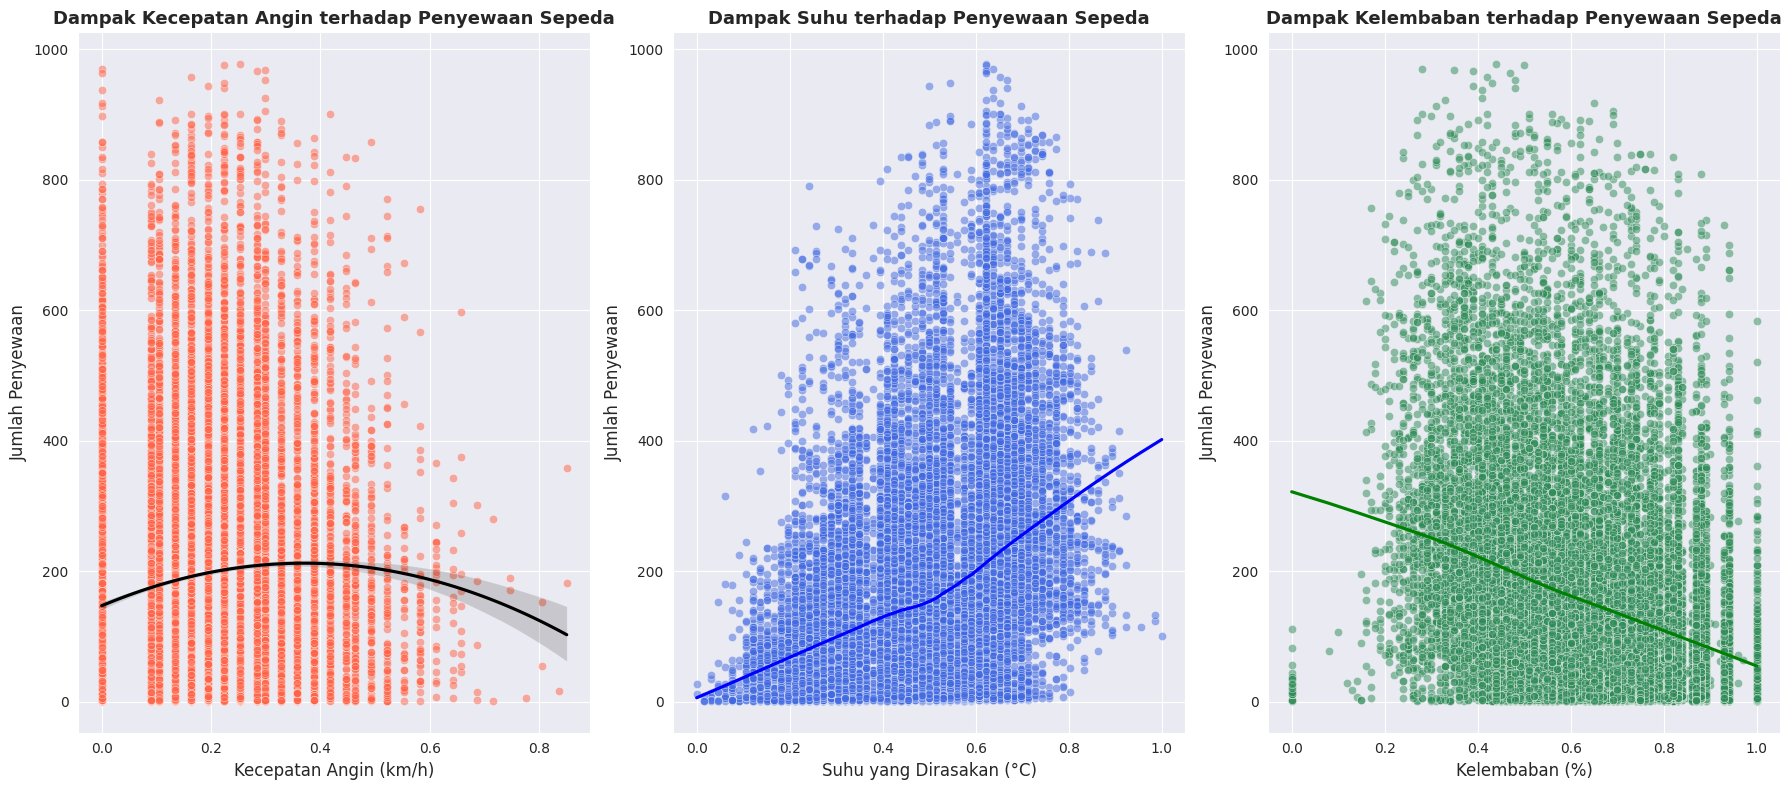

In [25]:
# Mengatur ukuran figure dan gaya visualisasi
plt.figure(figsize=(18, 8))
sns.set_style("darkgrid")  # Tampilan lebih profesional

# Subplot 1: Hubungan antara kecepatan angin dan jumlah penyewaan (dengan regresi lebih akurat)
plt.subplot(1, 3, 1)
sns.scatterplot(
    x='kecepatan_angin',
    y='jumlah',
    data=hour,
    alpha=0.5,
    color="tomato"
)
sns.regplot(
    x='kecepatan_angin',
    y='jumlah',
    data=hour,
    scatter=False,
    color="black",
    order=2  # Regresi polynomial untuk menangkap hubungan non-linear
)
plt.title('Dampak Kecepatan Angin terhadap Penyewaan Sepeda', fontsize=13, fontweight='bold')
plt.xlabel('Kecepatan Angin (km/h)', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)

# Subplot 2: Hubungan antara suhu yang dirasakan dan jumlah penyewaan
plt.subplot(1, 3, 2)
sns.scatterplot(
    x='suhu_terasa',
    y='jumlah',
    data=hour,
    alpha=0.5,
    color="royalblue"
)
sns.regplot(
    x='suhu_terasa',
    y='jumlah',
    data=hour,
    scatter=False,
    color="blue",
    lowess=True  # Gunakan metode smooth untuk meningkatkan akurasi tren
)
plt.title('Dampak Suhu terhadap Penyewaan Sepeda', fontsize=13, fontweight='bold')
plt.xlabel('Suhu yang Dirasakan (°C)', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)

# Subplot 3: Hubungan antara kelembaban dan jumlah penyewaan
plt.subplot(1, 3, 3)
sns.scatterplot(
    x='kelembaban',
    y='jumlah',
    data=hour,
    alpha=0.5,
    color="seagreen"
)
sns.regplot(
    x='kelembaban',
    y='jumlah',
    data=hour,
    scatter=False,
    color="green",
    lowess=True  # Menyesuaikan regresi agar lebih smooth
)
plt.title('Dampak Kelembaban terhadap Penyewaan Sepeda', fontsize=13, fontweight='bold')
plt.xlabel('Kelembaban (%)', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

## 1. Dampak Kecepatan Angin  
**Hubungan**: Non-linear (parabola terbalik)  
**Pola Grafik**:  
- Puncak penyewaan: kecepatan angin rendah-sedang  
- Penurunan tajam: saat kecepatan angin tinggi  

**Penjelasan**:  
- Angin ringan: dampak minimal  
- Angin kencang:  
  - Membuat bersepeda lebih berat  
  - Meningkatkan risiko kecelakaan  
  
---

Kecepatan angin berpengaruh non-linear, di mana angin kencang secara signifikan mengurangi minat penyewaan sepeda.  
## 2. Dampak Suhu yang Dirasakan
**Hubungan**: Positif  
**Pola Grafik**: Tren linier naik seiring peningkatan suhu  

**Penjelasan**:  
- Suhu hangat meningkatkan kenyamanan bersepeda → permintaan penyewaan naik  
- Pada suhu ekstrem (sangat panas) kemungkinan terjadi penurunan, tetapi tidak terlihat jelas dalam grafik ini  

Suhu yang dirasakan merupakan faktor positif yang signifikan dalam meningkatkan jumlah penyewaan sepeda.  

---

## 3. Dampak Kelembapan  
**Hubungan**: Negatif  
**Pola Grafik**: Tren menurun seiring peningkatan kelembapan  

**Penjelasan**:  
- Kelembapan tinggi berkaitan dengan cuaca lembap/tidak nyaman (mendung/hujan)  
- Mengurangi minat orang untuk bersepeda  

Kelembapan memiliki dampak negatif terhadap penyewaan sepeda, terutama karena menurunkan kenyamanan.  


## Analisis Lanjutan: Bagaimana pola penggunaan sepeda berbeda antara musim panas dan musim dingin, serta bagaimana cuaca memengaruhi tingkat penyewaan?

Tujuan dari visualisasi ini adalah untuk menggambarkan hubungan antara suhu yang dirasakan (atemp) dengan jumlah penyewaan sepeda (count) di dua musim, yaitu Summer dan Winter. Dengan ini, kita dapat memahami bagaimana suhu memengaruhi jumlah penyewaan sepeda di kedua musim yang sangat berbeda, yakni musim panas (Summer) yang lebih hangat dan musim dingin (Winter) yang lebih sejuk.

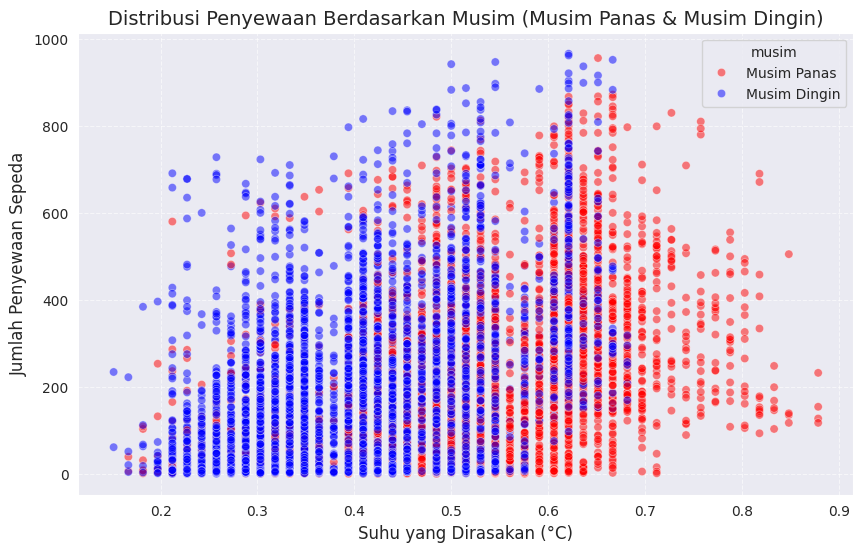

In [26]:
plt.figure(figsize=(10, 6))

# Filter hanya musim Panas dan Dingin
filtered_hour = hour[hour['musim'].isin(['Musim Panas', 'Musim Dingin'])]

sns.scatterplot(
    x='suhu_terasa',
    y='jumlah',
    data=filtered_hour,
    hue='musim',
    alpha=0.5,
    palette={"Musim Panas": "red", "Musim Dingin": "blue"}
)

plt.title('Distribusi Penyewaan Berdasarkan Musim (Musim Panas & Musim Dingin)', fontsize=14)
plt.xlabel('Suhu yang Dirasakan (°C)', fontsize=12)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=12)
plt.grid(True, linestyle="dashed", alpha=0.6)

plt.show()


Sumbu X (Suhu yang Dirasakan - atemp): Ini menunjukkan suhu yang dirasakan oleh pengguna sepeda, yang dapat bervariasi dari 0 hingga 1. Nilai ini menggambarkan suhu normal pada hari tersebut dengan normalisasi data.

Sumbu Y (Jumlah Penjualan - count): Menunjukkan total jumlah sepeda yang disewa pada hari tertentu.

Pewarnaan berdasarkan Musim: Titik pada grafik diwarnai dengan dua kategori musim, yaitu Summer (musim panas) dengan warna biru dan Winter (musim dingin) dengan warna oranye. Hal ini memudahkan untuk membandingkan penyewaan sepeda pada suhu yang berbeda untuk kedua musim tersebut.

**Insight:**

* Hubungan antara Suhu dan Penyewaan:

  * Musim Panas (Summer): Dapat terlihat bahwa pada musim panas, meskipun ada rentang suhu yang cukup besar (dari suhu rendah hingga tinggi), jumlah penyewaan sepeda relatif tinggi pada suhu yang lebih panas, meskipun ada sedikit penurunan pada suhu yang lebih tinggi (lebih mendekati 1).
  * Musim Dingin (Winter): Pada musim dingin, terdapat penurunan yang lebih jelas pada jumlah penyewaan sepeda seiring dengan meningkatnya suhu. Penyewaan sepeda lebih tinggi pada suhu yang lebih rendah.

* Perbandingan antara Musim:

  * Pada musim panas, meskipun suhu yang lebih tinggi cenderung mendekati titik teratas (1), jumlah penyewaan tetap relatif tinggi, menunjukkan bahwa pengguna sepeda lebih aktif pada musim panas.
  * Di sisi lain, pada musim dingin, penyewaan sepeda berkurang seiring dengan meningkatnya suhu, mengindikasikan bahwa sepeda cenderung digunakan lebih sedikit ketika suhu lebih tinggi, yang lebih sesuai dengan musim dingin yang lebih sejuk.

## Conclusion

### Pertanyaan 1: Bagaimana faktor eksternal seperti cuaca dan hari kerja memengaruhi preferensi pengguna casual dan terdaftar?


Berdasarkan analisis pengaruh hari kerja dan cuaca terhadap penyewa casual dan terdaftar, dapat disimpulkan bahwa pengguna casual lebih banyak menyewa sepeda pada hari libur dan saat cuaca cerah, sementara penyewa terdaftar lebih aktif pada hari kerja, meskipun cuaca buruk. Untuk mengoptimalkan penyewaan, bisnis dapat memfokuskan layanan pada akhir pekan dengan promosi spesial untuk penyewa casual dan meningkatkan langganan bulanan untuk penyewa terdaftar. Pada hari-hari hujan atau cuaca ekstrem, meskipun permintaan turun, bisnis bisa menawarkan layanan sepeda dalam ruangan atau insentif cuaca untuk pengguna terdaftar. Dengan menyesuaikan strategi berdasarkan pola penyewaan ini, bisnis dapat meningkatkan permintaan dan kepuasan pelanggan.

### Pertanyaan 2: Apa saja pola yang dapat ditemukan dalam persentase penyewaan sepeda oleh pengguna casual dan terdaftar sepanjang tahun 2011-2012?

Berdasarkan analisis proporsi penyewaan sepeda oleh pengguna casual dan terdaftar sepanjang 2011-2012, terlihat bahwa pengguna terdaftar mendominasi penyewaan sepeda, dengan proporsi meningkat hingga hampir 100% pada akhir 2012. Pengguna casual, di sisi lain, menunjukkan penurunan signifikan, terutama pada akhir 2012, dengan kontribusi mereka menurun menjadi hanya 5-10%. Meskipun musim panas tidak menyebabkan lonjakan pengguna casual, pengguna terdaftar terus meningkat setelah pertengahan 2011, kemungkinan berkat program langganan dan integrasi dengan transportasi publik.

Rekomendasi bisnis untuk mengoptimalkan penyewaan sepeda meliputi fokus pada pengembangan program langganan bulanan dan transportasi berbasis sepeda, mengurangi ketergantungan pada pengguna casual dengan memperkuat layanan untuk pengguna terdaftar, serta menawarkan promosi di musim liburan untuk menarik lebih banyak pengguna casual. Dengan strategi ini, bisnis dapat mempertahankan stabilitas penyewaan dan meningkatkan loyalitas pengguna terdaftar.

### Pertanyaan 3: Sejauh mana variabel cuaca (suhu yang dirasakan, kelembapan, dan kecepatan angin) memengaruhi jumlah total penyewaan sepeda harian dalam periode 2011-2012?

Berdasarkan analisis terhadap tiga variabel cuaca utama (suhu yang dirasakan, kelembapan, dan kecepatan angin) pada penyewaan sepeda harian selama periode 2011–2012, dapat disimpulkan bahwa suhu memiliki pengaruh positif yang signifikan terhadap peningkatan penyewaan, di mana semakin hangat suhu, semakin tinggi jumlah penyewaan. Sebaliknya, kelembapan menunjukkan pengaruh negatif yang kuat—semakin lembap cuaca, semakin rendah minat orang untuk menyewa sepeda. Kecepatan angin menunjukkan hubungan non-linear: kecepatan angin yang rendah hingga sedang mendukung penyewaan, tetapi kecepatan tinggi justru menurunkannya secara drastis.

Rekomendasi bisnis: Untuk memaksimalkan pendapatan, perusahaan penyewaan sepeda sebaiknya menyesuaikan strategi operasional dengan kondisi cuaca. Misalnya, menambah armada atau promosi saat cuaca hangat dan kering, serta mengurangi stok atau menawarkan diskon saat kelembapan tinggi atau angin kencang. Prediksi cuaca harian juga bisa diintegrasikan ke dalam sistem perencanaan dan pemasaran.










## Analisis Lanjutan: Bagaimana pola penggunaan sepeda berbeda antara musim panas dan musim dingin, serta bagaimana cuaca memengaruhi tingkat penyewaan?



Berdasarkan analisis data suhu yang dirasakan dan jumlah penyewaan sepeda pada dua musim (musim panas dan musim dingin), dapat disimpulkan bahwa pola penggunaan sepeda sangat dipengaruhi oleh cuaca, terutama suhu. Pada musim panas, meskipun suhu cenderung lebih tinggi, jumlah penyewaan sepeda tetap relatif tinggi, menandakan bahwa pengguna lebih aktif dalam bersepeda di cuaca yang lebih panas. Sebaliknya, pada musim dingin, penyewaan sepeda lebih rendah, terutama pada suhu yang lebih tinggi, yang menunjukkan bahwa cuaca dingin mempengaruhi pengurangan penggunaan sepeda.

Rekomendasi:
Untuk meningkatkan jumlah penyewaan sepeda, terutama pada musim dingin, penyedia layanan bisa mempertimbangkan untuk menawarkan fasilitas yang lebih sesuai dengan kebutuhan pengguna di musim dingin, seperti perlengkapan tambahan untuk kenyamanan bersepeda dalam cuaca dingin. Selain itu, untuk musim panas, promosi atau penawaran yang menyoroti kenyamanan bersepeda pada suhu yang lebih tinggi bisa lebih diperkuat.

## Download file dataset


In [27]:
hour.to_csv("bikedataset.csv", index=False)
